In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_set = pd.read_csv(r'C:\Users\Hp\OneDrive\Desktop\Kaggle work\House Prices\train.csv')
test_set = pd.read_csv(r'C:\Users\Hp\OneDrive\Desktop\Kaggle work\House Prices\test.csv')

In [5]:
train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [9]:
train_set.shape

(1460, 81)

In [10]:
test_set.shape

(1459, 80)

c:\Users\Hp\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


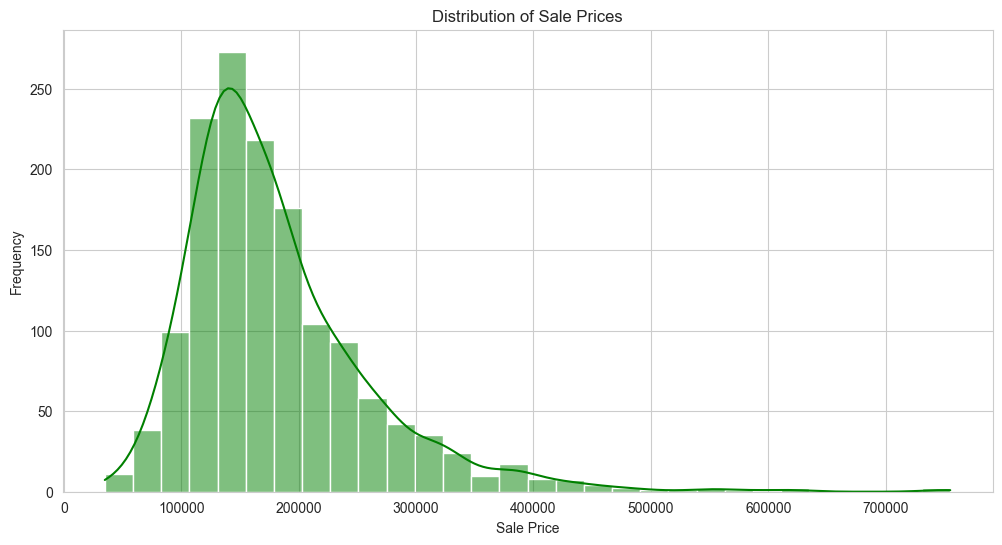

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.histplot(train_set['SalePrice'],kde=True, bins=30, color='green')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

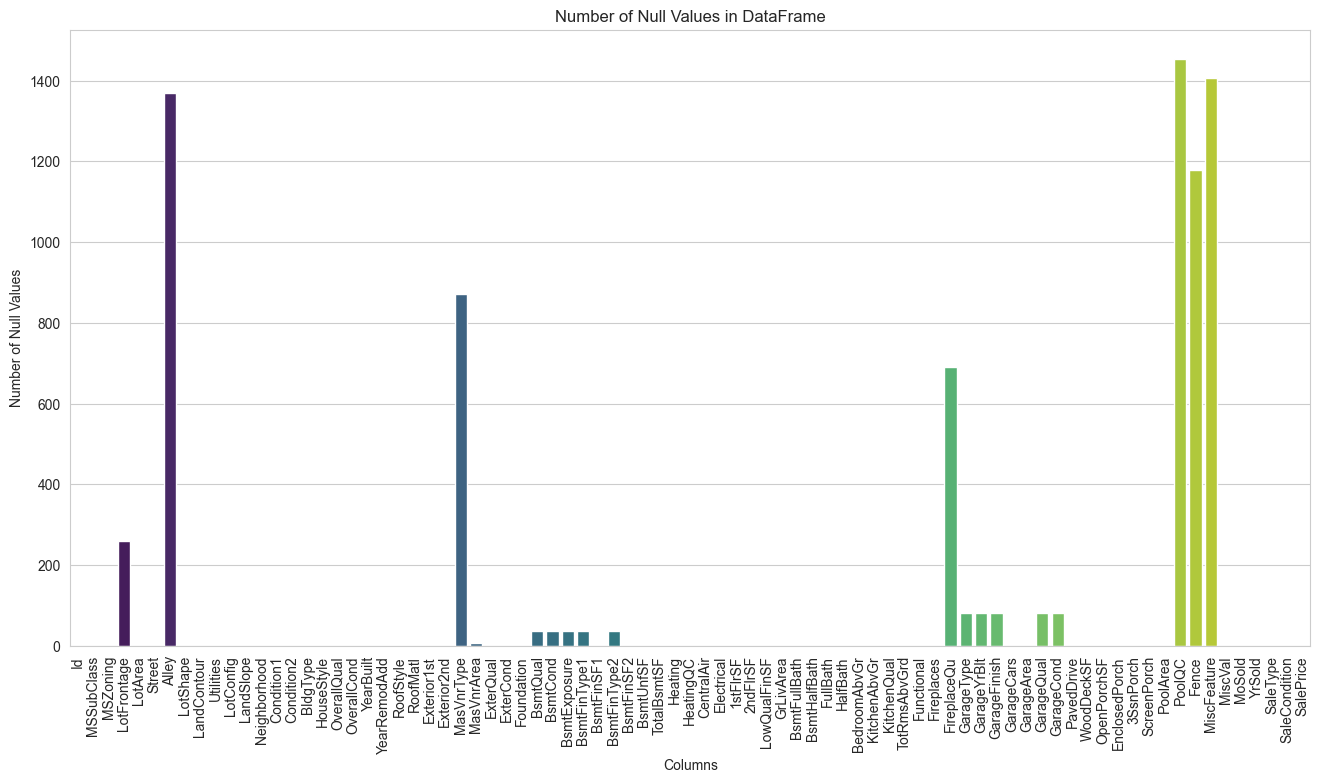

In [12]:
train_null_counts = train_set.isnull().sum()
# Create a bar plot using Seaborn
plt.figure(figsize=(16,8))
sns.barplot(x=train_null_counts.index, y=train_null_counts.values, palette='viridis')

# Add labels and title
plt.title('Number of Null Values in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

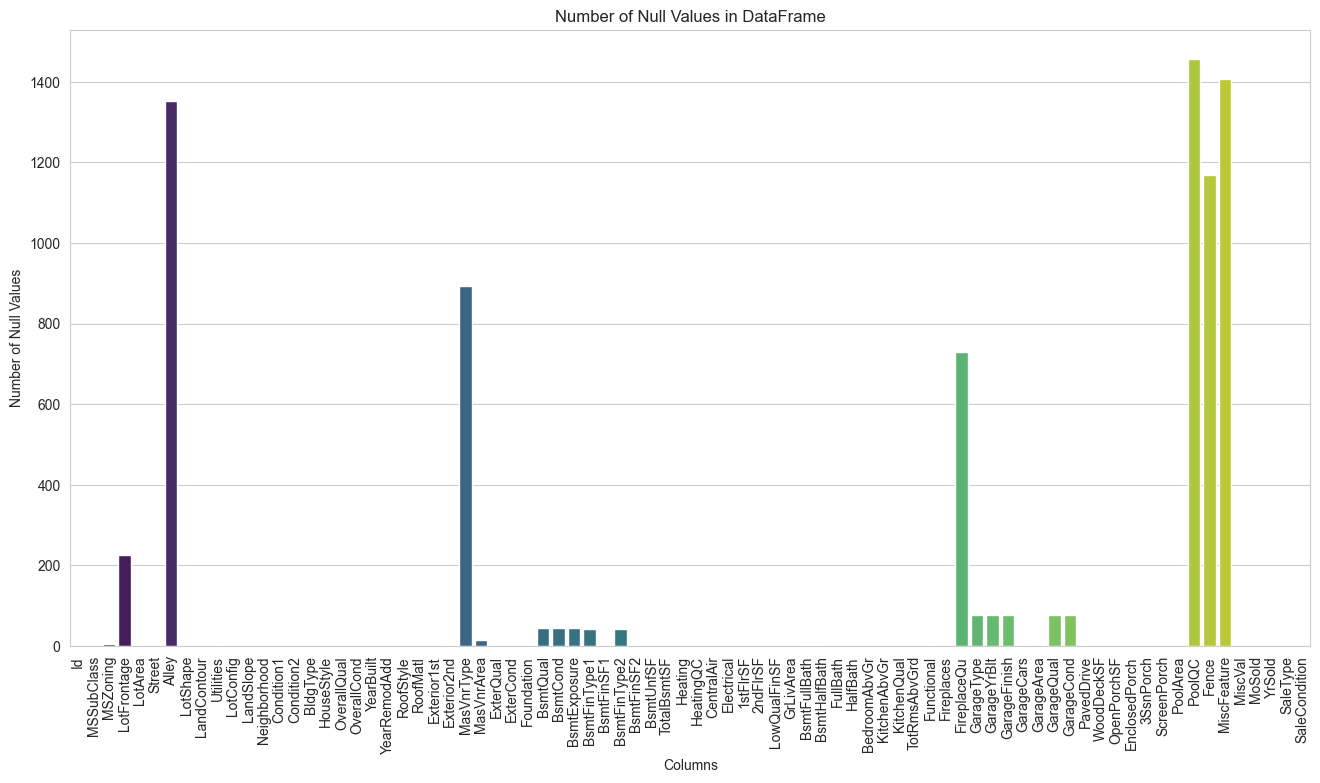

In [13]:
test_null_counts = test_set.isnull().sum()
# Create a bar plot using Seaborn
plt.figure(figsize=(16,8))
sns.barplot(x=test_null_counts.index, y=test_null_counts.values, palette='viridis')

# Add labels and title
plt.title('Number of Null Values in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [14]:
train_set.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType'], axis=1, inplace=True)
test_set.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType'], axis=1, inplace=True)

In [15]:
train_set.shape

(1460, 76)

In [16]:
test_set.shape

(1459, 75)

In [17]:
X = train_set.drop(['Id', 'SalePrice'], axis=1)
Y = train_set['SalePrice']
X_test = test_set.drop(['Id'], axis=1)

In [18]:
num_col = X.select_dtypes(include=['int64', 'float64']).columns
cat_col = X.select_dtypes(include=['object']).columns


In [19]:
num_transformer = Pipeline(steps=[('Imputer', SimpleImputer(strategy='mean')),
                                  ('Scalar', StandardScaler())])
cat_transformer = Pipeline(steps=[('Imputer', SimpleImputer(strategy='most_frequent')),
                                  ('OneHot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_col),
                                               ('cat', cat_transformer, cat_col)])


In [20]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('Imputer', SimpleImputer()),
                                                 ('Scalar', StandardScaler())]),
                                 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalf...
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object'))])

In [33]:
model = GradientBoostingRegressor(n_estimators=1500, learning_rate=0.01, random_state=42)


In [34]:
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])
my_pipeline.fit(X, Y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer()),
                                                                  ('Scalar',
                                                                   StandardScaler())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrL...
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.01,
                                           n_estimators=1500,
                                           random_state=42))])

In [35]:
y_pred = my_pipeline.predict(X_test)
predictions_df = pd.DataFrame({
    'Id': test_set['Id'],
    'SalePrice': y_pred
})
predictions_df.head()


,Id,SalePrice
0,1461,120374.736789
1,1462,162859.899018
2,1463,178488.500856
3,1464,183176.293962
4,1465,192861.786856


In [36]:
predictions_df.to_csv(r'C:\Users\Hp\OneDrive\Desktop\Kaggle work\House Prices\Y_pred.csv', index=False)